## Name - Pramukh Bharadwaj Kittoor Muralidhar 
### Github Username - pramukhbharadwaj


Import all the required modules

In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

### 1. Tree-Based Methods

#### (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [50]:
df = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20)

df_train = df.copy(deep = True)

df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [51]:
df = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20)

df_test = df.copy(deep = True)

df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [52]:
full_data_df = pd.concat([df_train, df_test], ignore_index=True)

full_data_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
75996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
75997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
75998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


#### (b) Data Preparation
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

Reference
https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

Missing values can either be handles using deletion or data imputation

Imputation techniques
Some of the techniques are -

1. Replace it with a statistic measure mean/median. We can also replace it with the mode.
2. Using Machine Learning models to predict the missing value using other features.

In [53]:
full_data_df = full_data_df.replace('na',np.nan)
imp_X = full_data_df[full_data_df.columns[1:]]
imp_y = full_data_df[full_data_df.columns[0]]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_X = pd.DataFrame(imputer.fit_transform(imp_X), columns = imp_X.columns)
imp_X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852.0,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18.0,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636.0,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110.0,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


ii. For each of the 170 features, calculate the coefficient of variation CV = s/m , where s is sample standard deviation and m is sample mean.

In [54]:
cov = imp_X.apply(lambda col : col.std()/col.mean(), axis=0)
cov

aa_000      4.328608
ab_000      2.178273
ac_000      2.167653
ad_000    206.721500
ae_000     22.293670
             ...    
ee_007      4.885098
ee_008      3.335037
ee_009      5.753933
ef_000     47.919544
eg_000     45.650950
Length: 170, dtype: float64

iii. Plot a correlation matrix for your features using pandas or any other tool.

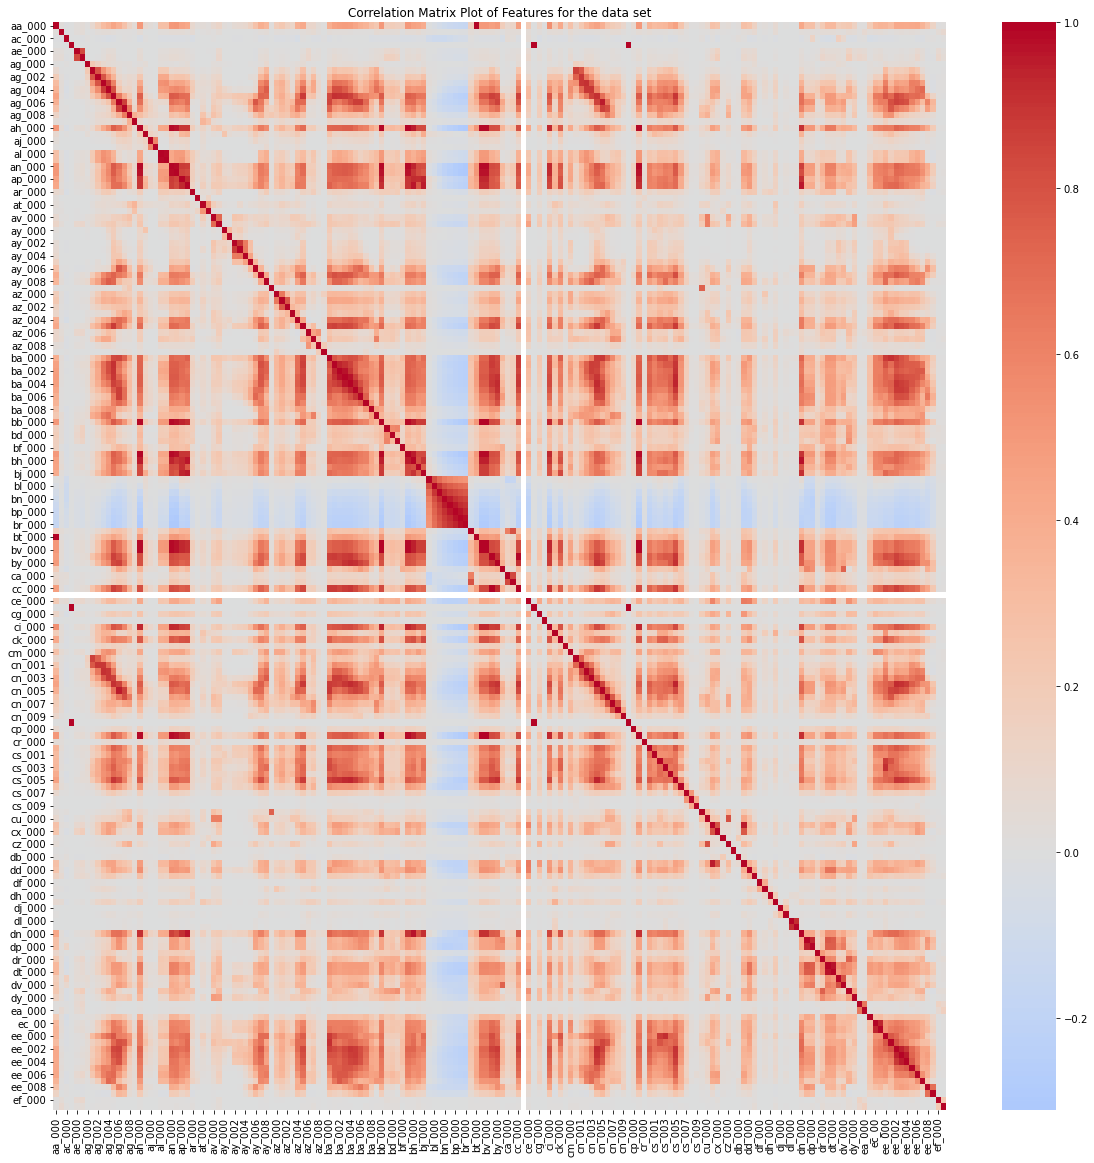

In [55]:
fig, axes = plt.subplots(figsize=(20, 20))
corr = imp_X.corr()
sns.heatmap(corr, center = 0, ax = axes, cmap = 'coolwarm')
plt.title("Correlation Matrix Plot of Features for the data set")
plt.show()

iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [56]:
n = int(np.floor(np.sqrt(170)))
high_cv_features = cov.sort_values(ascending=False)[:n]
high_cv_features

cf_000    207.270274
co_000    206.876129
ad_000    206.721500
cs_009    192.522611
dj_000    122.128153
as_000    113.882755
dh_000    112.652450
df_000    111.369666
ag_000     91.460654
au_000     86.085638
ak_000     78.622988
az_009     77.999556
ay_009     77.461101
dtype: float64

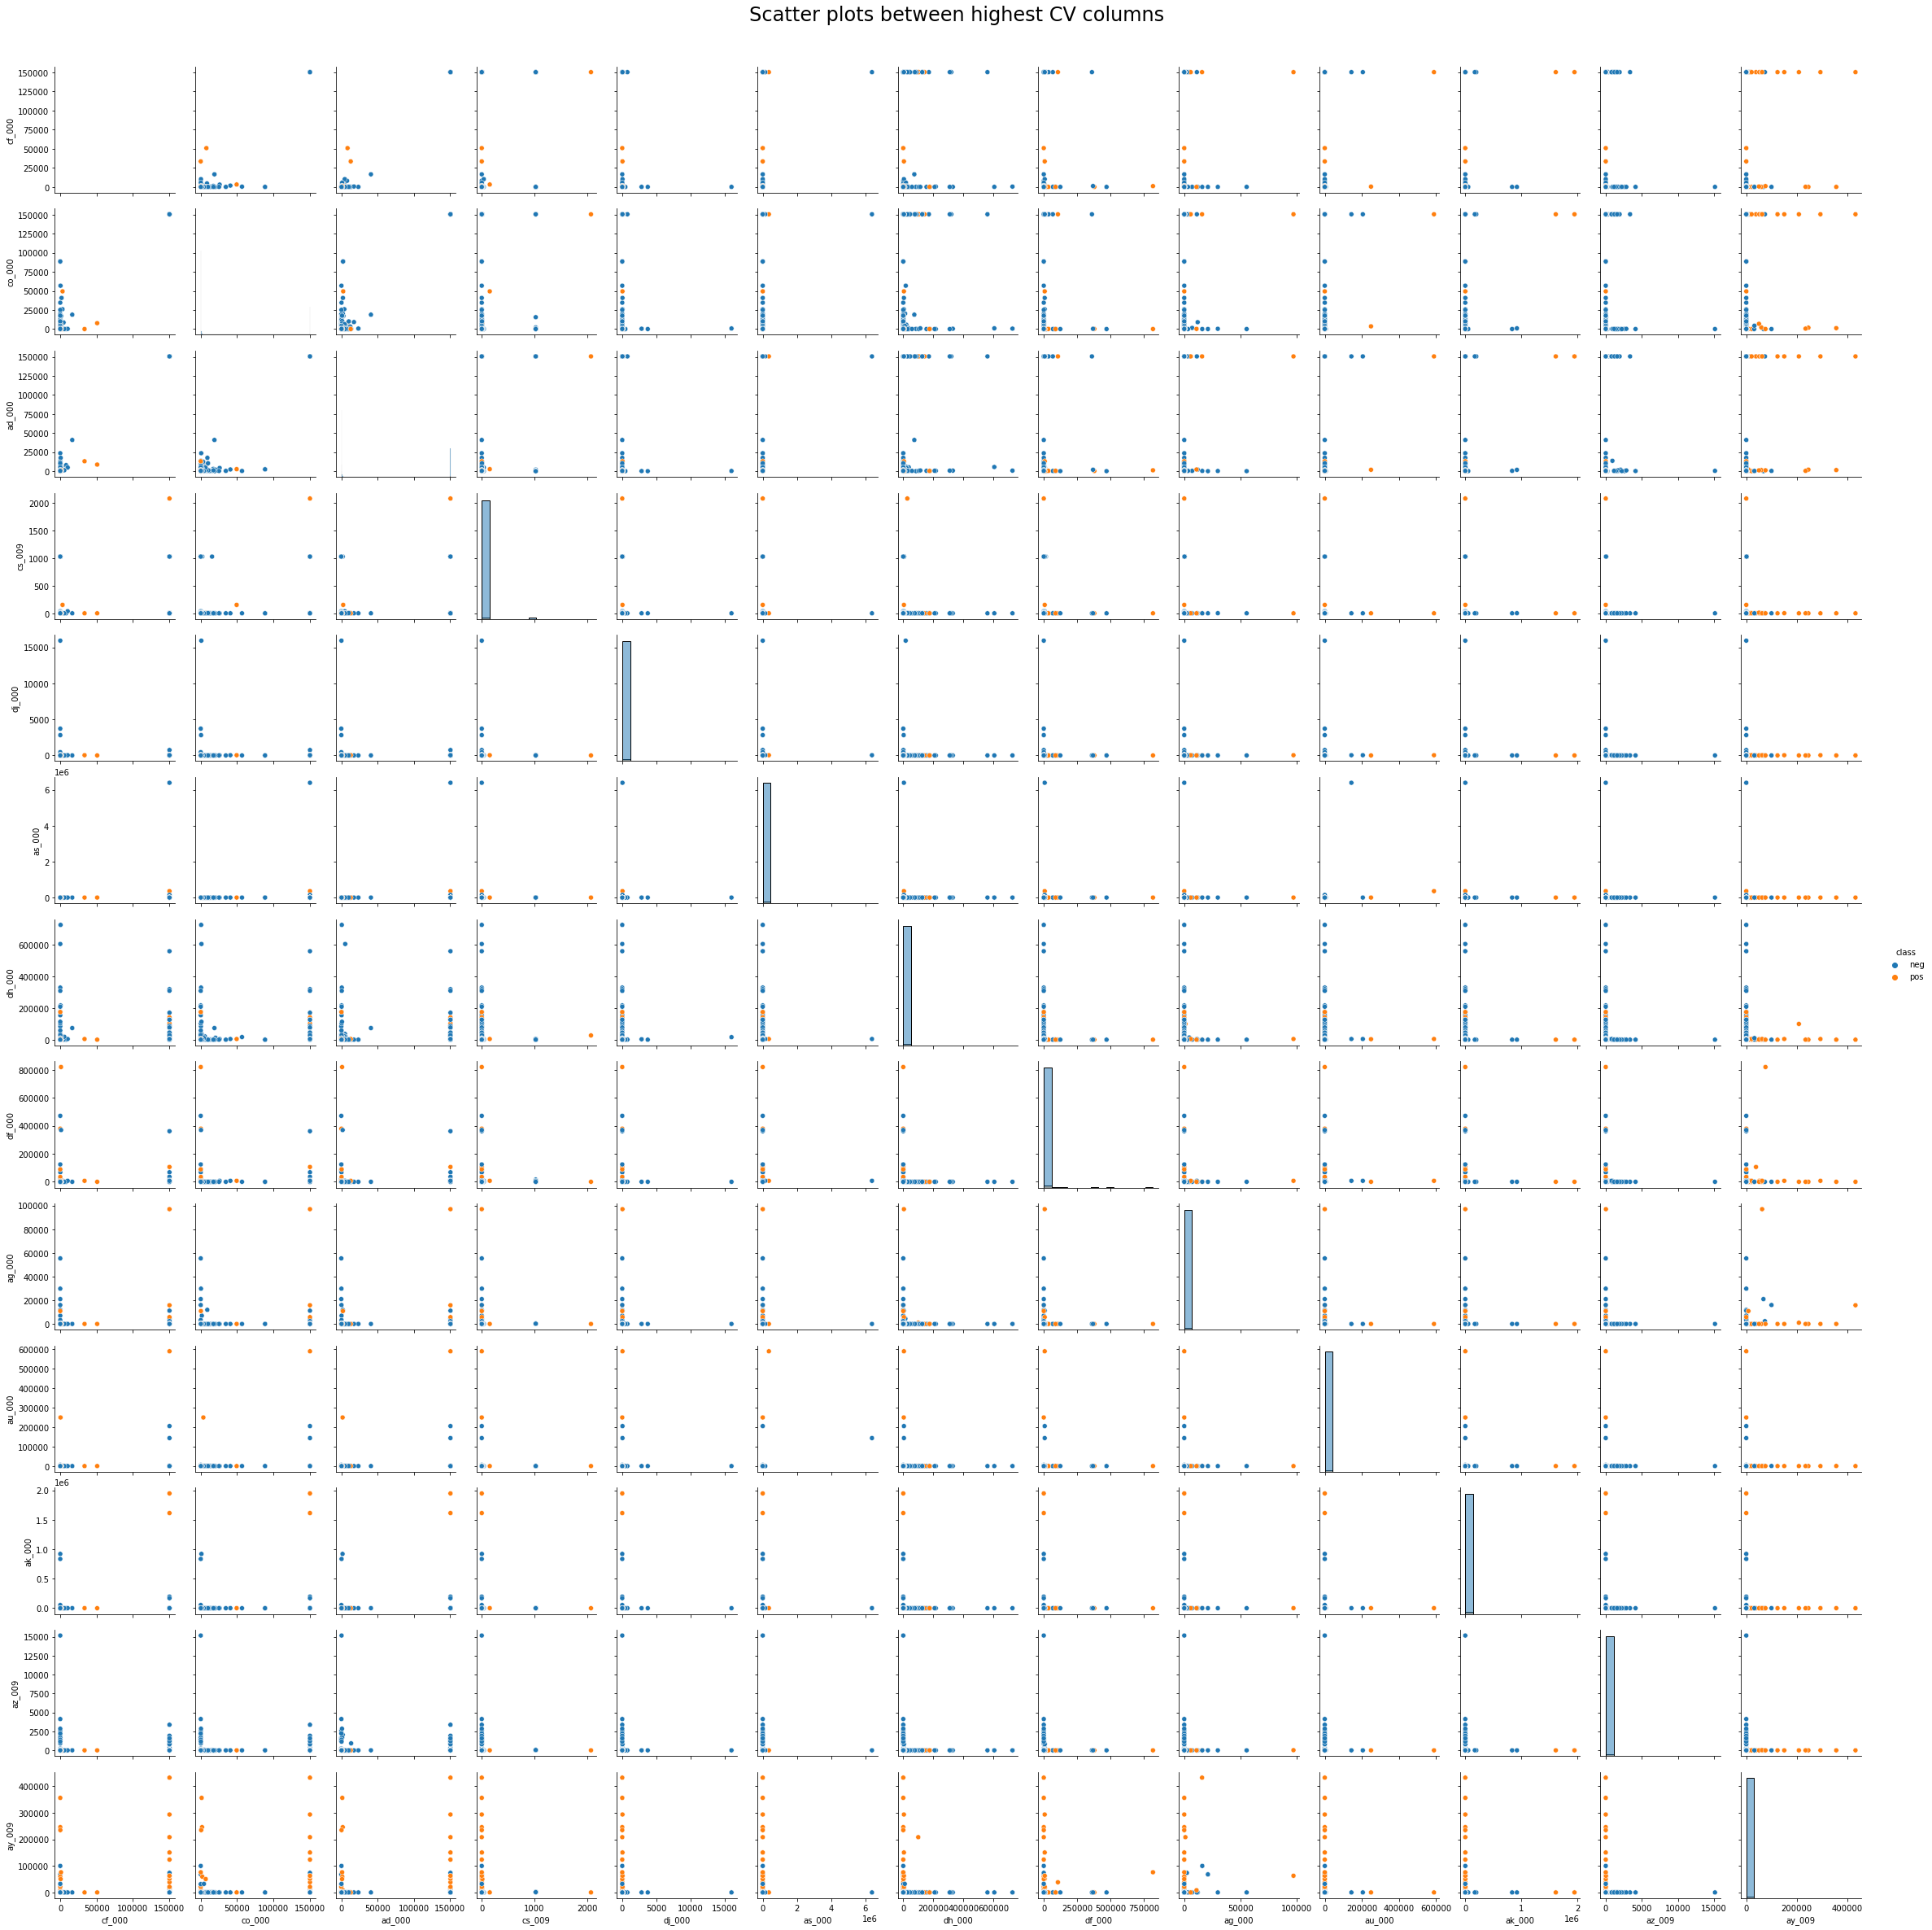

In [57]:
aps_scatter = imp_X[high_cv_features.index.tolist()]
aps_scatter['class'] = imp_y
pair_plot = sns.pairplot(aps_scatter.sample(frac=0.1), hue='class', diag_kind='hist')
pair_plot.fig.suptitle("Scatter plots between highest CV columns", y=1.02, fontsize=24)
plt.show()

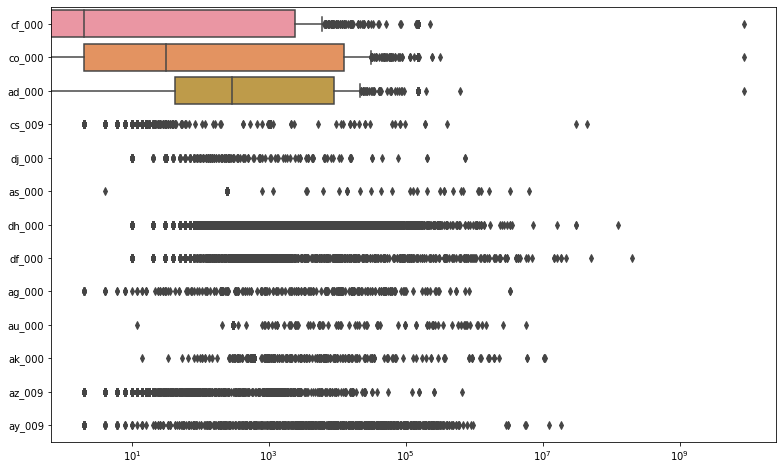

In [58]:
fig, axes = plt.subplots(figsize=(13, 8))
box = sns.boxplot(data= imp_X[high_cv_features.index.tolist()], orient='h', ax=axes)
box.set(xscale="log")
plt.show()

Conclusion: It is too early to draw any conclusions about significance of highest CV features, just by looking at the scatter plots

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [59]:
print("positive data", imp_y.value_counts()['pos'])
print("negative data", imp_y.value_counts()['neg'])

positive data 1375
negative data 74625


We can see that the dataset is hugely imbalanced

#### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forest and compare it to the test error.

In [60]:
imp_y = pd.DataFrame(imp_y, columns=['class'])
imp_y

,class
0,neg
1,neg
2,neg
3,neg
4,neg
...,...
75995,neg
75996,neg
75997,neg
75998,neg


In [61]:
def encodeClass(x):
    if x == 'pos':
        return 1
    elif x == 'neg':
        return 0

imp_y.loc[imp_y['class']=='neg','class']=0
imp_y.loc[imp_y['class']=='pos','class']=1

X_train = imp_X.iloc[0:60000,:]
y_train = imp_y.iloc[0:60000, :]
X_test = imp_X.iloc[60000:,:]
y_test = imp_y.iloc[60000:,:]

X_train = X_train.astype('float')
y_train = y_train.astype('int')
X_test = X_test.astype('float')
y_test = y_test.astype('int')

In [62]:
def model_summary(y_true, y_pred, prob):
    print("Confusion Matrix is \n")
    print(confusion_matrix(y_true, y_pred))
    

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print("\nThe misclassification in the data set is ",(fp+fn))
    fpr, tpr, thresholds = roc_curve(y_true, prob)
    area = auc(fpr, tpr)
    
    print("\nArea under the curve is ", format(round(area, 3)))
    print("\nThe accuracy score is ", format(round(accuracy_score(y_true,y_pred), 3)))
    print("\nThe error obtained is ", format(round(1 - accuracy_score(y_true,y_pred), 3)))
    label = "ROC Curve : area = {} ". format(round(area, 3))
    plt.plot(fpr, tpr, label = label)
    plt.plot([0,1], [0,1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC AUC Curve")
    plt.legend()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


Confusion Matrix is 

[[58970    30]
 [  429   571]]

The misclassification in the data set is  459

Area under the curve is  0.988

The accuracy score is  0.992

The error obtained is  0.008

OOB Score: 0.9911333333333333


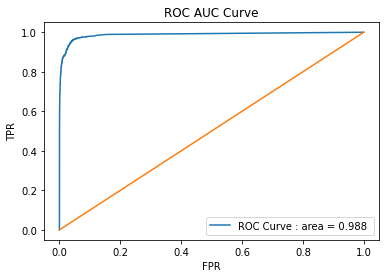

In [63]:
clf=RandomForestClassifier(max_depth=5, 
                               random_state=100, 
                               verbose=1, oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_train)
y_prob = clf.predict_proba(X_train)

model_summary(y_train, y_pred, y_prob[:,1])
print("\nOOB Score:", clf.oob_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Confusion Matrix is 

[[15612    13]
 [  178   197]]

The misclassification in the data set is  191

Area under the curve is  0.993

The accuracy score is  0.988

The error obtained is  0.012

OOB Score: 0.9911333333333333


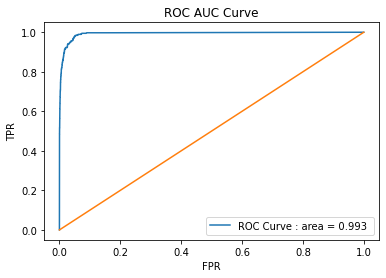

In [64]:
clf=RandomForestClassifier(max_depth=5, 
                               random_state=100, 
                               verbose=1, oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

model_summary(y_test, y_pred, y_prob[:,1])
print("\nOOB Score:", clf.oob_score_)

In [65]:
print("The Out of Bag error estimate for the random forset is ", round((1 - clf.oob_score_), 4))
print("\nThe test error is ", round((1 - accuracy_score(y_test,y_pred)), 4))

The Out of Bag error estimate for the random forset is  0.0089

The test error is  0.0119


We can see that Out of Bag error estimate is less than the test error

#### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


Confusion Matrix is 

[[56621  2379]
 [   30   970]]

The misclassification in the data set is  2409

Area under the curve is  0.989

The accuracy score is  0.96

The error obtained is  0.04

OOB Score: 0.9589166666666666


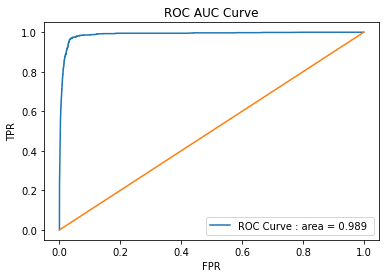

In [66]:
clf=RandomForestClassifier(max_depth=5, 
                               random_state=100, 
                               verbose=1, oob_score=True, class_weight='balanced')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_train)
y_prob = clf.predict_proba(X_train)

model_summary(y_train, y_pred, y_prob[:,1])
print("\nOOB Score:", clf.oob_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Confusion Matrix is 

[[15017   608]
 [   14   361]]

The misclassification in the data set is  622

Area under the curve is  0.989

The accuracy score is  0.961

The error obtained is  0.039

OOB Score: 0.9589166666666666


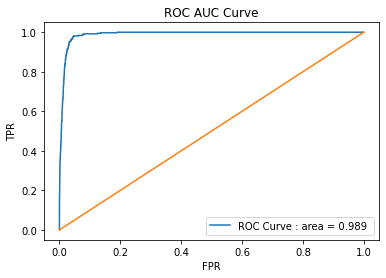

In [67]:
clf=RandomForestClassifier(max_depth=5, 
                               random_state=100, 
                               verbose=1, oob_score=True, class_weight='balanced')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

model_summary(y_test, y_pred, y_prob[:,1])
print("\nOOB Score:", clf.oob_score_)

In [68]:
print("The Out of Bag error estimate for the random forset is ", round((1 - clf.oob_score_), 4))
print("\nThe test error is ", round((1 - accuracy_score(y_test,y_pred)), 4))

The Out of Bag error estimate for the random forset is  0.0411

The test error is  0.0389


We can see that Out of Bag error estimate is more than the test error

Conclusion : Accuracy of training and test set is higher in 1c compared to 2d. However, the model in 1d now can classify the minority class in a better way.

#### (e) XGBoost and Model Trees 
In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰀j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.


In [ ]:
folds = KFold(5, shuffle = True, random_state = 7)
alphas = [10**i for i in range(-5, 6)]
cv_error = []
for alpha in alphas:
    xgb_reg = xgb.XGBClassifier(objective ='binary:logistic', reg_alpha = alpha)
    cv_res = cross_val_score(xgb_reg, X_train, y_train, cv=folds, scoring="f1")
    cv_error.append(np.abs(cv_res.mean()))
    
cv_error_df = pd.DataFrame({'alpha':alphas,'cross_validation_error': cv_error})
cv_error_df

[18:05:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
best_alpha = cv_error_df.loc[cv_error_df.cross_validation_error == min(cv_error_df.cross_validation_error)]
best_alpha

#### Using  5 fold cross validation methods to estimate the error of your trained model ()

In [ ]:
xgb_reg = xgb.XGBClassifier(objective ='binary:logistic', reg_alpha = 1000).fit(X_train, y_train)
train_pred = xgb_reg.predict(X_train)
train_prob = xgb_reg.predict_proba(X_train)
train_error = mean_squared_error(y_train, train_pred)
print("The train error for XGBoost model is ", train_error)
model_summary(y_train, train_pred, train_prob[:,1])

#### Using  5 fold cross validation methods to estimate the error of your test model ()

In [ ]:
test_pred = xgb_reg.predict(X_test)
test_prob = xgb_reg.predict_proba(X_test)
test_error = mean_squared_error(y_test, test_pred)
print("The train error for XGBoost model is ", test_error)
model_summary(y_test, test_pred, test_prob[:,1])

Conclusion: Train error is less compared to test error

### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo- gistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.


In [ ]:
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train, y_train)
neg_data = smote_y.value_counts()[0]
pos_data = smote_y.value_counts()[1]
print("The number of positive data is ", pos_data)
print("\nThe number of negative data is ", neg_data)

In [ ]:
folds = KFold(5, shuffle = True, random_state = 7)
alphas = [10**i for i in range(-5, 4)]
cv_error = []
for alpha in alphas:
    xgb_reg = xgb.XGBClassifier(objective ='binary:logistic', reg_alpha = alpha)
    cv_res = cross_val_score(xgb_reg, smote_X, smote_y, cv=folds, scoring="f1")
    cv_error.append(np.abs(cv_res.mean()))
    
cv_error_df = pd.DataFrame({'alpha':alphas,'cross_validation_error': cv_error})
cv_error_df

In [ ]:
best_alpha = cv_error_df.loc[cv_error_df.cross_validation_error == min(cv_error_df.cross_validation_error)]
best_alpha

#### Using  5 fold cross validation methods to estimate the error of your trained model ()

In [ ]:
xgb_reg = xgb.XGBClassifier(objective ='binary:logistic', reg_alpha = 1000).fit(smote_X, smote_y)
train_pred = xgb_reg.predict(smote_X)
train_prob = xgb_reg.predict_proba(smote_X)
train_error = mean_squared_error(smote_y, train_pred)
print("The train error for XGBoost model is ", train_error)
model_summary(smote_y, train_pred, train_prob[:,1])

#### Using  5 fold cross validation methods to estimate the error of your test model ()

In [ ]:
test_pred = xgb_reg.predict(X_test)
test_prob = xgb_reg.predict_proba(X_test)
test_error = mean_squared_error(y_test, test_pred)
print("The train error for XGBoost model is ", test_error)
model_summary(y_test, test_pred, test_prob[:,1])

### Compare the uncompensated case with SMOTE case

Even though the accuracy score is less compared to what we had before SMOTE, this should not be mistaken. Before using SMOTE, everything was being classified as negative class. From the confusion matrix, it is clear that our model when used without SMOTE fails to predict positive classes as the number of sample is very less compared to the negative class. However, when we do over sampling using SMOTE our model is able to predict the positive class really well along with the negative class.

## 2. ISLR 6.6.3 
## 3. ISLR, 6.6.5
## 4. ISLR 8.4.5


For answers to the above questions, please refer the attached pdf

## 5. ISLR 9.7.3


### 3 Here we explore the maximal margin classifier on a toy data set.

In [ ]:
df_dict = {'X1' : [3, 2, 4, 1, 2, 4, 4], 'X2' : [4, 2, 4, 4, 1, 3, 1], 'Y' : ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']}
df = pd.DataFrame.from_dict(df_dict)
df

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C = 10000)
svc.fit(df.iloc[:, :-1], df.iloc[:, -1])

fig, axes = plt.subplots(figsize=(7, 7))

axes.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, -1], s=30, cmap=plt.cm.Paired)

xlim = axes.get_xlim()
ylim = axes.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

lines1 = axes.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label="Decision Boundary")

axes.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label="Suppor Vectors")

lines2 = axes.contour(XX, YY, Z - 0.2, colors='g', levels=[0], alpha=0.5, linestyles=['-'])

axes.scatter([4.0], [2.0], color='r', marker='^', s=50, label="Additional point")
axes.legend()
plt.show()
print(svc.intercept_, svc.coef_)

### (b). Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

The black solid line shows the optimal hyperplane. For the equation please refer the PDF.

### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

Please refer the PDF

### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

The dashed line in the above graph is the hyperplane.

### (e) Indicate the support vectors for the maximal margin classifier.

Support vectors are shown as the blue small circles on the hyperplane.

### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

As the 7th point is not on the margin hyperplane it will not afect the maximal marginal hyperplane.

### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.


The green line shows the not optimal hyperplane. For the equation please refer the PDF.

### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

The new point marked as red triangle makes the two classes no longer seperable by a hyperplane.